

Gustavo de Leon 17085

Andres Urizar 17632


## MiniProyecto 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
from itertools import zip_longest
import math

#### Ejercicio 1

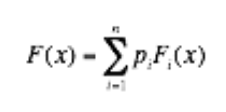

### Describa un algoritmo para generar V

Se genera una J que es distribuida en los enteros no negativos,  por lo que  P(J=i) = pi para todo j

Si J = i entonces simular Yi de Fi

Asignar X = Yi

Investigado de:
- http://www-eio.upc.es/personal/homepages/lmontero/lmm_tm/MESIO-SIM%20-%20%28US%29%20Generation%20of%20random%20variables.pdf
- https://www2.isye.gatech.edu/~sman/courses/6644/Module07-RandomVariateGenerationSlides_171116.pdf
- http://www.columbia.edu/~mh2078/MonteCarlo/MCS_Generate_RVars.pdf

### Demuestre que el algoritmo genera adecuadamente V

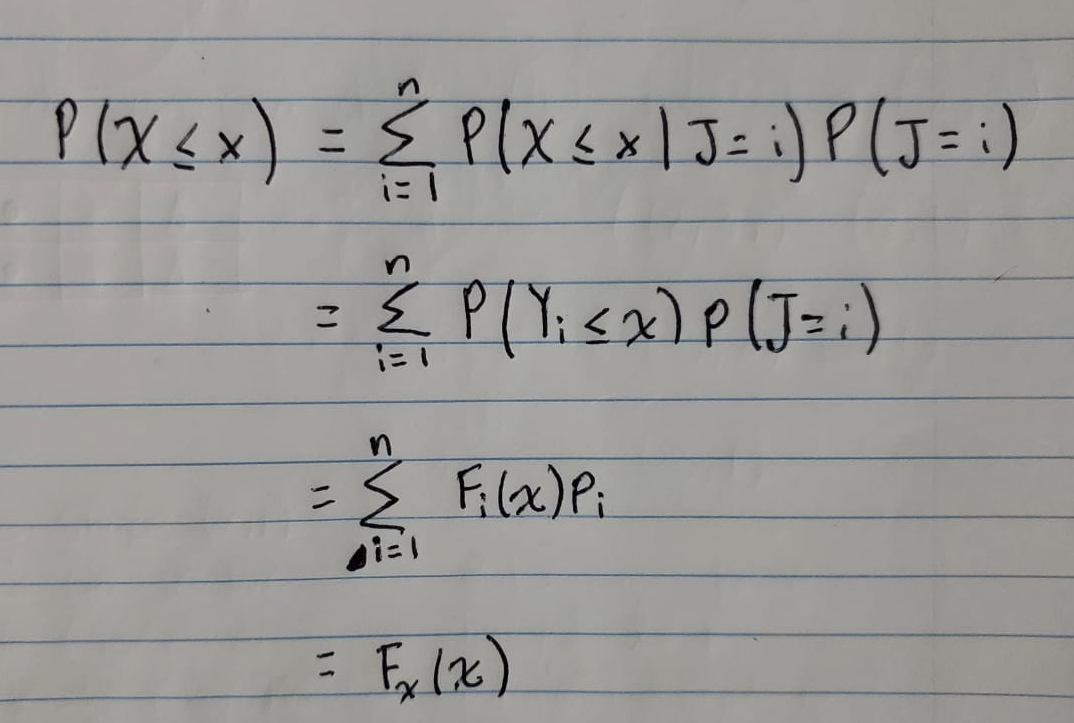

#### Ejercicio 2

Escriba un programa tal que, dada una función de masa de probabilidad (pi, para i de 1 a n), proporcione como salida el valor de una variable aleatoria con esta función de masa. Haga un histograma para alguna distribución de ejemplo

In [57]:
def acumuladaPonderada(x,fmasa):
    tam = len(fmasa)
    cont = 0
    ponderada = 0.0
    while cont <= tam-1:
        if cont == 0:
            if x >= 0.0 and x < fmasa[0][1]:
                return fmasa[0][0]
            ponderada = fmasa[0][1]
        elif cont == tam-1:
            if x >= ponderada and x < 1:
                return fmasa[tam-1][0]
        else:
            if x >= ponderada and x < ponderada + fmasa[cont+1][1]:
                return fmasa[cont][0]
            ponderada += fmasa[cont+1][1]
        cont += 1
        

In [39]:
masa = [[0,0.125],[1,0.375],[2,0.375],[3,0.125]]
print("Resultado"+str(acumuladaPonderada(0.925,masa)))

Tam4
0
1
2
3
Resultado3


Resultados de VA[5, 2, 4, 2, 5, 6, 3, 4, 2, 4, 6, 3, 5, 1, 4, 2, 5, 6, 4, 2, 2, 5, 2, 5, 2, 3, 3, 5, 3, 1, 5, 2, 2, 4, 2, 1, 6, 6, 6, 5, 4, 2, 1, 3, 1, 6, 6, 6, 4, 6, 5, 6, 6, 6, 4, 3, 2, 5, 2, 6, 5, 4, 3, 4, 6, 2, 6, 2, 6, 5, 2, 5, 4, 1, 2, 6, 2, 6, 5, 2, 1, 6, 3, 4, 6, 6, 5, 5, 5, 2, 2, 3, 2, 2, 2, 5, 6, 5, 1]


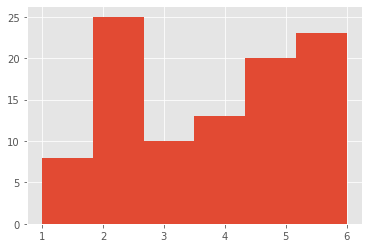

In [59]:
N = 100
masa = [[1,0.13333],[2,0.20000],[3,0.20000],[4,0.13333],[5,0.13333],[6,0.20000]]
resultados = []
for i in range(1,N):
    u = random.random()
    resultados.append(acumuladaPonderada(u,masa))
print('Resultados de VA'+str(resultados))
plt.style.use('ggplot')
plt.hist(resultados,bins=6)
plt.show()

#### Ejercicio 3 VPN

Realice tres simulaciones para determinar cuál de los proyectos es el más rentable. Utilice 100, 1000 y 10000 iteraciones

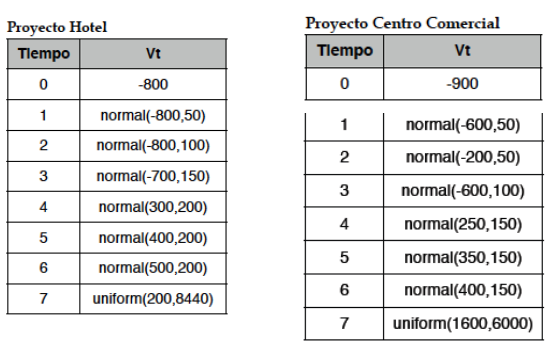

Asignacion de valores de la tabla de tiempo y Vt

In [334]:
def vt(mus,sigmas,uniformal):
    lista = []
    for mu, sigma in zip_longest(mus, sigmas):
        lista.append(np.random.normal(mu, sigma))
    lista.append(np.random.uniform(uniformal[0],uniformal[1]))
    return lista

Formula de VPN

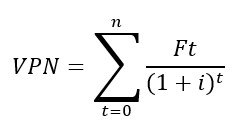

In [335]:
def sumatoria(lista,tas,inicial):
    resp = inicial
    for t in lista:
        resp += t/(1+tas)**(lista.index(t)+1)
    return resp

Iteraciones

In [337]:
def iteraciones(n,media,varianza,uniforme,tasa,inicial):
    fin = []
    for i in range(n):
        valores = vt(media,varianza,uniforme)
        resp = sumatoria(valores,tasa,inicial)
        fin.append(resp)
    final = sum(fin)/len(fin)
    return final

Asignacion de valores Hotel

In [336]:
media = [-800,-800,-700,300,400,500]
varianza = [50,100,150,200,200,200]
uniforme = [200,8440]
tasa = 0.1
inicial = -800

Asignacion de valores Centro Comercial

In [341]:
media2 = [-600,-200,-600,250,350,400]
varianza2 = [50,50,100,150,150,150]
uniforme2 = [1600,6000]
tasa2 = 0.1
inicial2 = -900

##### 100 iteraciones Hotel

In [338]:
final = iteraciones(100,media,varianza,uniforme,tasa,inicial)
final

229.09426490406543

##### 100 iteraciones Centro Comercial

In [342]:
final = iteraciones(100,media2,varianza2,uniforme2,tasa2,inicial2)
final

439.9259374873956

##### 1000 iteraciones Hotel

In [339]:
final = iteraciones(1000,media,varianza,uniforme,tasa,inicial)
final

289.11270945194354

##### 1000 Iteraciones Centro Comercial

In [345]:
final = iteraciones(1000,media2,varianza2,uniforme2,tasa2,inicial2)
final

503.1436224999972

##### 100000 Iteraciones Hotel

In [340]:
final = iteraciones(10000,media,varianza,uniforme,tasa,inicial)
final

260.26754130675187

##### 10000 Iteraciones Centro Comercial

In [346]:
final = iteraciones(10000,media2,varianza2,uniforme2,tasa2,inicial2)
final

493.1586637119846

En cada una de las pruebas con diferentes iteraciones el Proyecto de Centro Comercial tiene mayores valores de VPN por lo que este proyecto es el mejor para invertir.

#### Ejercicio 4

Usted es un voceador que quiere saber si le conviene más comprar diariamente 9, 10 u 11 periódicos. Además, sabe que el 30% de los días le piden 9, el 40% de los días le piden 10 y el 30% de los días le piden 11. Si usted compra los periódicos para luego venderlos,y paga  1.50 por periódico, lo vende a  2.50, y por cada periódico no vendido se le reembolsa  0.50, ¿cuál es la cantidad que más le conviene comprar todos los días? Simule para un mes, un año y diez años.

Variables a utilizar

In [1]:
PAGA = 1.50
VENDE = 2.50
REEMBOLSA = 0.50
MES = 31
ANIO = 365
ANIOS10 = 3650


perdida = 0
ganancia = 0
ganancias_9_mes = 0
ganancias_9_anio = 0
ganancias_9_10anios = 0

ganancias_10_mes = 0
ganancias_10_anio = 0
ganancias_10_10anios = 0

ganancias_11_mes = 0
ganancias_11_anio = 0
ganancias_11_10anios = 0

ganancias_meses = [0,0,0]
ganancias_anio = [0,0,0]
ganancias_10anios = [0,0,0]

gastos_meses = [0,0,0]
gastos_anio = [0,0,0]
gastos_10anios = [0,0,0]

Función para las graficas

In [5]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

labels = ['9 periodicos', '10 periodicos', '11 periodicos']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

Predicción en un 1 mes

In [4]:
for i in range(0,MES):
    u =  random.random()
    #print('random'+str(u))
    if (u <= 0.30):
        ganancias_9_mes += VENDE - PAGA
        ganancias_10_mes += VENDE + REEMBOLSA - PAGA
        ganancias_11_mes += VENDE + REEMBOLSA - PAGA
    elif (u > 0.30 and u <= 0.70):
        ganancias_9_mes += VENDE - PAGA
        ganancias_10_mes += VENDE - PAGA
        ganancias_11_mes += VENDE + REEMBOLSA - PAGA
    elif(u > 0.70 and u < 1):
        ganancias_9_mes += VENDE - PAGA
        ganancias_10_mes += VENDE - PAGA
        ganancias_11_mes += VENDE - PAGA
ganancias_meses = [ganancias_9_mes,ganancias_10_mes, ganancias_11_mes]
gastos_meses = [PAGA*9*MES,PAGA*10*MES,PAGA*11*MES]

print("Ganancias por mes vendiendo 9 periodicos: "+str(ganancias_9_mes))
print("Ganancias por mes vendiendo 10 periodicos: "+str(ganancias_10_mes))
print("Ganancias por mes vendiendo 11 periodicos: "+str(ganancias_11_mes))

Ganancias por mes vendiendo 9 periodicos: 31.0
Ganancias por mes vendiendo 10 periodicos: 35.5
Ganancias por mes vendiendo 11 periodicos: 41.5


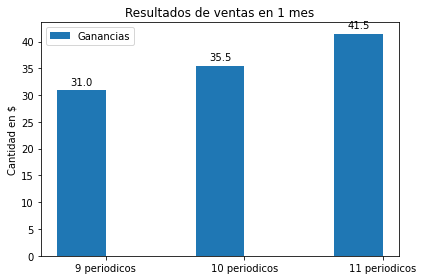

In [6]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ganancias_meses, width, label='Ganancias')
#rects2 = ax.bar(x + width/2, gastos_meses, width, label='Perdidas')

ax.set_ylabel('Cantidad en $')
ax.set_title('Resultados de ventas en 1 mes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

Predicción a un año

In [7]:
for i in range(0,ANIO):
    u =  random.random()
    #print('random'+str(u))
    if (u <= 0.30):
        ganancias_9_anio += VENDE - PAGA
        ganancias_10_anio += VENDE + REEMBOLSA - PAGA
        ganancias_11_anio += VENDE + REEMBOLSA - PAGA
    elif (u > 0.30 and u <= 0.70):
        ganancias_9_anio += VENDE - PAGA
        ganancias_10_anio += VENDE - PAGA
        ganancias_11_anio += VENDE + REEMBOLSA - PAGA
    elif(u > 0.70 and u < 1):
        ganancias_9_anio += VENDE - PAGA
        ganancias_10_anio += VENDE - PAGA
        ganancias_11_anio += VENDE - PAGA
ganancias_anio = [ganancias_9_anio,ganancias_10_anio, ganancias_11_anio]
gastos_anio = [PAGA*9*ANIO,PAGA*10*ANIO,PAGA*11*ANIO]

print("Ganancias por año vendiendo 9 periodicos: "+str(ganancias_9_anio))
print("Ganancias por año vendiendo 10 periodicos: "+str(ganancias_10_anio))
print("Ganancias por año vendiendo 11 periodicos: "+str(ganancias_11_anio))

Ganancias por año vendiendo 9 periodicos: 365.0
Ganancias por año vendiendo 10 periodicos: 417.5
Ganancias por año vendiendo 11 periodicos: 488.0


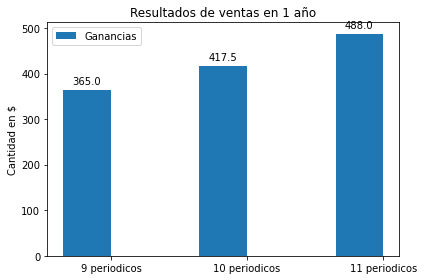

In [8]:
# Grafica de anio
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ganancias_anio, width, label='Ganancias')
#rects2 = ax.bar(x + width/2, gastos_meses, width, label='Perdidas')

ax.set_ylabel('Cantidad en $')
ax.set_title('Resultados de ventas en 1 año')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

Predicción a 10 años

In [9]:
for i in range(0,ANIOS10):
    u =  random.random()
    #print('random'+str(u))
    if (u <= 0.30):
        ganancias_9_10anios += VENDE - PAGA
        ganancias_10_10anios += VENDE + REEMBOLSA - PAGA
        ganancias_11_10anios += VENDE + REEMBOLSA - PAGA
    elif (u > 0.30 and u <= 0.70):
        ganancias_10_10anios += VENDE - PAGA
        ganancias_11_10anios += VENDE + REEMBOLSA - PAGA
    elif(u > 0.70 and u < 1):
        ganancias_11_10anios += VENDE - PAGA
ganancias_10anios = [ganancias_9_10anios,ganancias_10_10anios, ganancias_11_10anios]
gastos_10anios = [PAGA*9*ANIOS10,PAGA*10*ANIOS10,PAGA*11*ANIOS10]

print("Ganancias por año vendiendo 9 periodicos: "+str(ganancias_9_10anios))
print("Ganancias por año vendiendo 10 periodicos: "+str(ganancias_10_10anios))
print("Ganancias por año vendiendo 11 periodicos: "+str(ganancias_11_10anios))


Ganancias por año vendiendo 9 periodicos: 1139.0
Ganancias por año vendiendo 10 periodicos: 3128.5
Ganancias por año vendiendo 11 periodicos: 4929.5


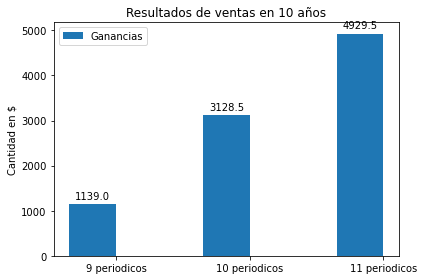

In [10]:
#Grafica de 10 anios
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ganancias_10anios, width, label='Ganancias')
#rects2 = ax.bar(x + width/2, gastos_meses, width, label='Perdidas')

ax.set_ylabel('Cantidad en $')
ax.set_title('Resultados de ventas en 10 años')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

Al analizar las gráficas, y tomar en cuenta los elementos como el reembolso y la cantidad de ventas, pero lo que se puede visualizar es que siempre vender 11 periódicos, aún que no se venden todos si da ganancia, se nota sobre todo en los resultados de ventas en 10 años, debido que aquí es más notorio el gran abismo que hay entre vender 9 períodicos y 11 períodicos, es de más de $3000 y casi $1000 con respecto a vender 10 periódicos. En cada uno de los resultados, y pruebas con valores aleotorios siempre conviene más pagar por los 11 periódicos. 